### RNN partial observables

Set up environment

In [1]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

2025-04-09 16:14:12.081105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744208054.106773   38310 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744208054.598079   38310 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744208058.567175   38310 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744208058.567205   38310 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744208058.567207   38310 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' to sys.path
Setup Complete.


#### RNN full

Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 300
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...


2025-04-09 11:14:31.357037: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 300 episodes...
Episode 20	Total Reward: 15.00	Actor Loss: 3.0540	Critic Loss: 37.8161
Episode 40	Total Reward: 18.00	Actor Loss: -0.5693	Critic Loss: 50.7811
Episode 60	Total Reward: 15.00	Actor Loss: 0.4326	Critic Loss: 22.0567
Episode 80	Total Reward: 25.00	Actor Loss: 2.1570	Critic Loss: 25.1343
Episode 100	Total Reward: 28.00	Actor Loss: 0.9514	Critic Loss: 12.4493
Episode 120	Total Reward: 32.00	Actor Loss: 1.3041	Critic Loss: 23.7784
Episode 140	Total Reward: 93.00	Actor Loss: 1.1812	Critic Loss: 30.4912
Episode 160	Total Reward: 241.00	Actor Loss: -0.1043	Critic Loss: 21.0128
Episode 180	Total Reward: 370.00	Actor Loss: 3.0086	Critic Loss: 46.8727
Episode 200	Total Reward: 354.00	Actor Loss: -2.4816	Critic Loss: 46.1427
Episode 220	Total Reward: 500.00	Actor Loss: -0.4258	Critic Loss: 8.8375
Episode 240	Total Reward: 500.00	Actor Loss: -0.1260	Critic Loss: 7.3998
Episode 260	Total Reward: 500.00	Actor Loss: -0.4045	Critic Loss: 7.1059
Ep

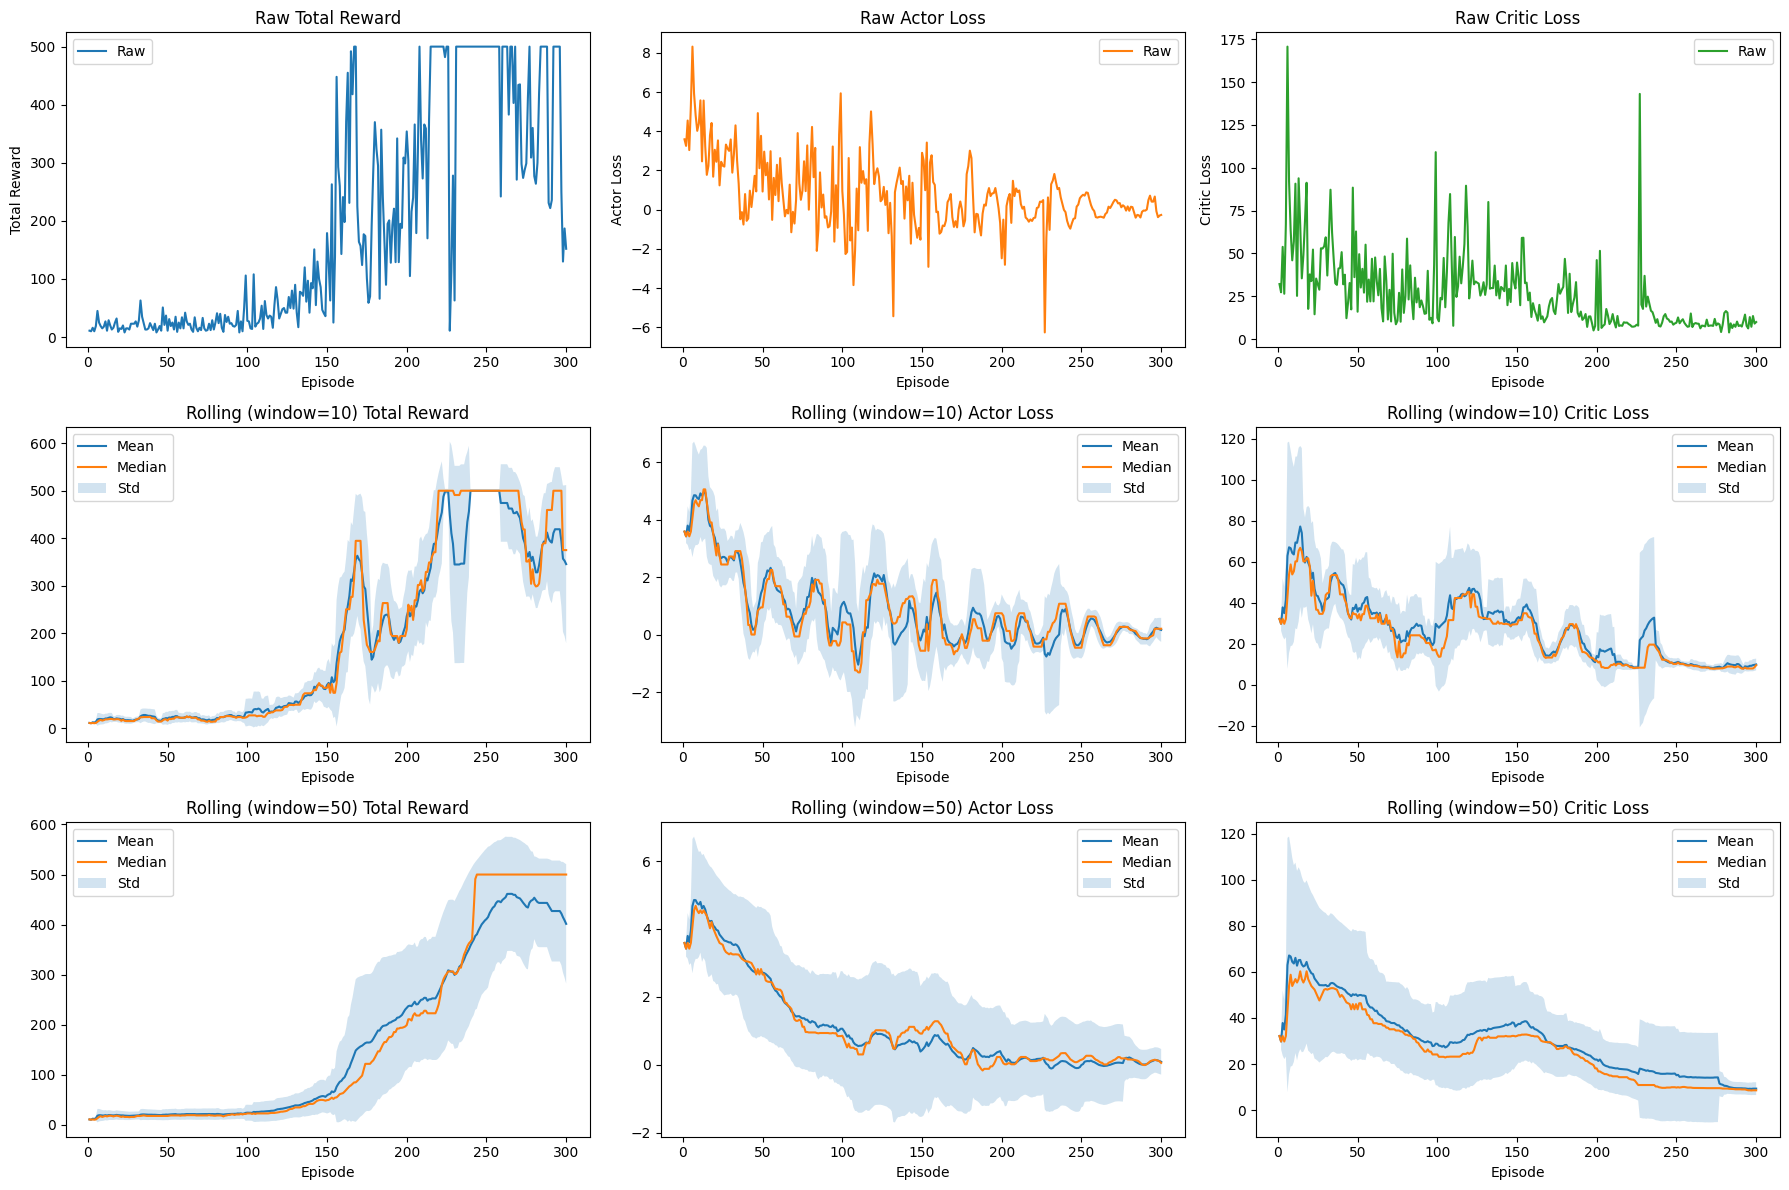

Metrics plot displayed.
Plotting neuron firing rates...


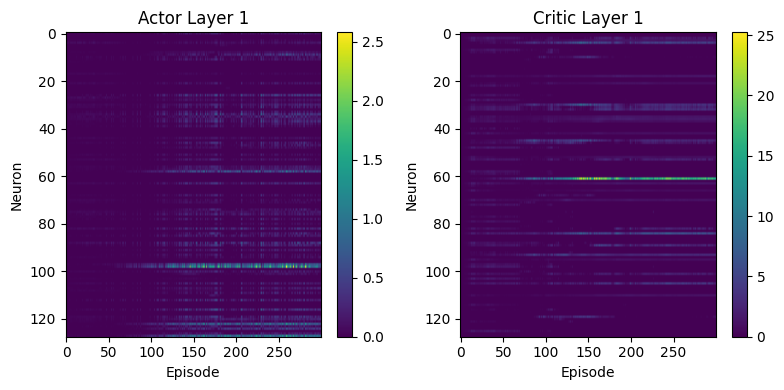

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [2]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 300,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
env = gym.make(config["env_name"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"]
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

#### FFNN full

Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 300
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: Dense
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 300 episodes...
Episode 20	Total Reward: 15.00	Actor Loss: 1.1888	Critic Loss: 15.3456
Episode 40	Total Reward: 31.00	Actor Loss: 0.8153	Critic Loss: 8.9211
Episode 60	Total Reward: 26.00	Actor Loss: 2.4612	Critic Loss: 21.2158
Episode 80	Total Reward: 30.00	Actor Loss: 0.0734	Critic Loss: 14.1444
Episode 100	Total Reward: 70.00	Actor Loss: 3.0723	Critic Loss: 41.2949
Episode 120	Total Reward: 110.00	Actor Loss: 0.8213	Critic Loss: 32.3717
Episode 140	Total Reward: 101.00	Actor Loss: 

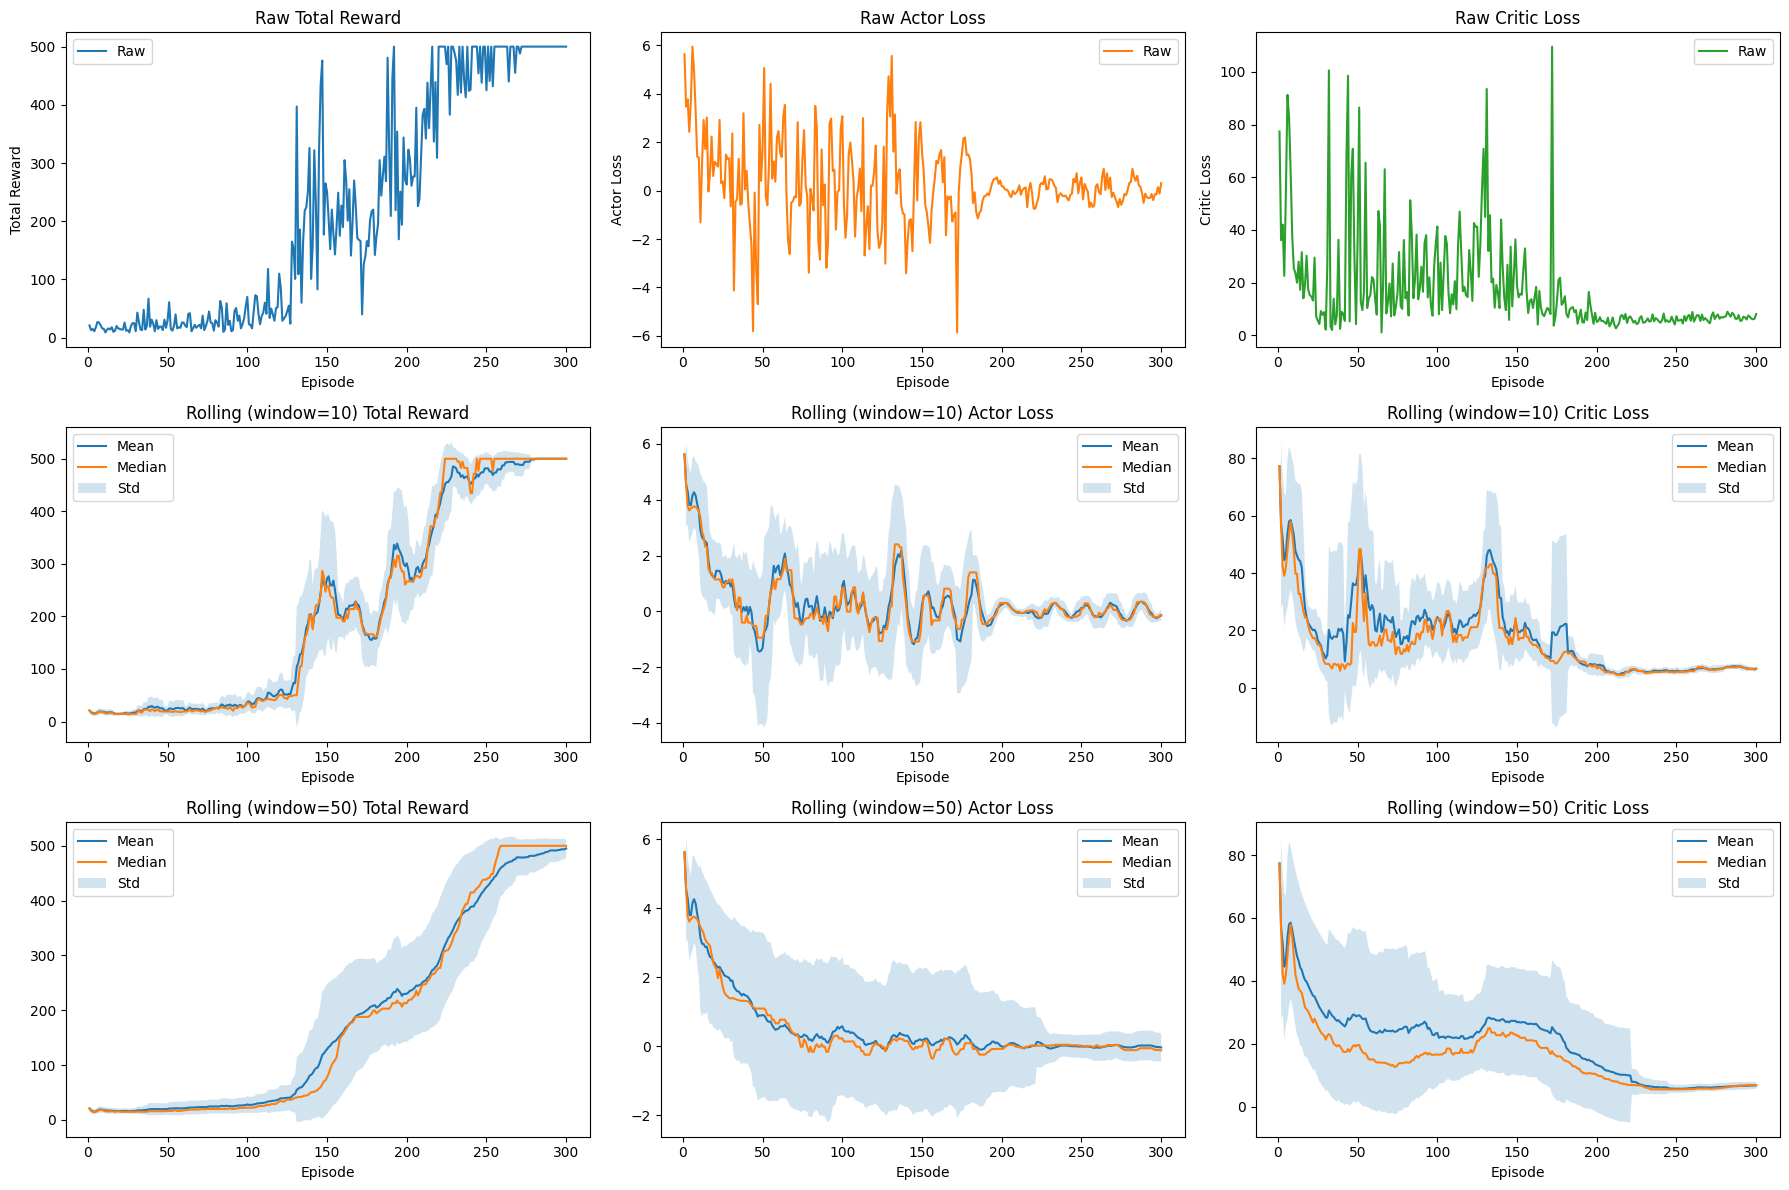

Metrics plot displayed.
Firing rate data not available (models might be Dense or logging was disabled/failed).
Closing the environment...
Environment closed.


In [3]:
# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 300,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "Dense",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
env = gym.make(config["env_name"])

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"]
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

## Modifications: partial observation of states

Now, only the cart position and the pole angle are observed. This way, an RNN will learn the velocities (given by the hidden states) while a FFNN will not learn these so learning should be much worse.

#### RNN partial

2025-04-10 10:03:55.563926: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744272235.965565   93466 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744272236.479014   93466 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744272241.065492   93466 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744272241.065519   93466 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744272241.065520   93466 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' to sys.path
Setup Complete.
Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.001
  critic_lr: 0.001
  num_episodes: 5000
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 20
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...


2025-04-10 10:05:11.591191: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 5000 episodes...
Episode 20	Total Reward: 17.00	Actor Loss: 4.8054	Critic Loss: 58.3737
Episode 40	Total Reward: 30.00	Actor Loss: 6.4929	Critic Loss: 109.4740
Episode 60	Total Reward: 23.00	Actor Loss: 4.6297	Critic Loss: 69.3159
Episode 80	Total Reward: 18.00	Actor Loss: 3.8548	Critic Loss: 49.2572
Episode 100	Total Reward: 15.00	Actor Loss: 2.8052	Critic Loss: 34.3491
Episode 120	Total Reward: 12.00	Actor Loss: 1.6827	Critic Loss: 22.6289
Episode 140	Total Reward: 15.00	Actor Loss: 1.5903	Critic Loss: 28.5191
Episode 160	Total Reward: 47.00	Actor Loss: 5.2890	Critic Loss: 75.1523
Episode 180	Total Reward: 16.00	Actor Loss: 0.7490	Critic Loss: 26.5545
Episode 200	Total Reward: 23.00	Actor Loss: 3.0783	Critic Loss: 31.0727
Episode 220	Total Reward: 13.00	Actor Loss: -0.7896	Critic Loss: 27.3405
Episode 240	Total Reward: 20.00	Actor Loss: 0.2798	Critic Loss: 24.9050
Episode 260	Total Reward: 15.00	Actor Loss: 0.6357	Critic Loss: 16.3903
Episode 

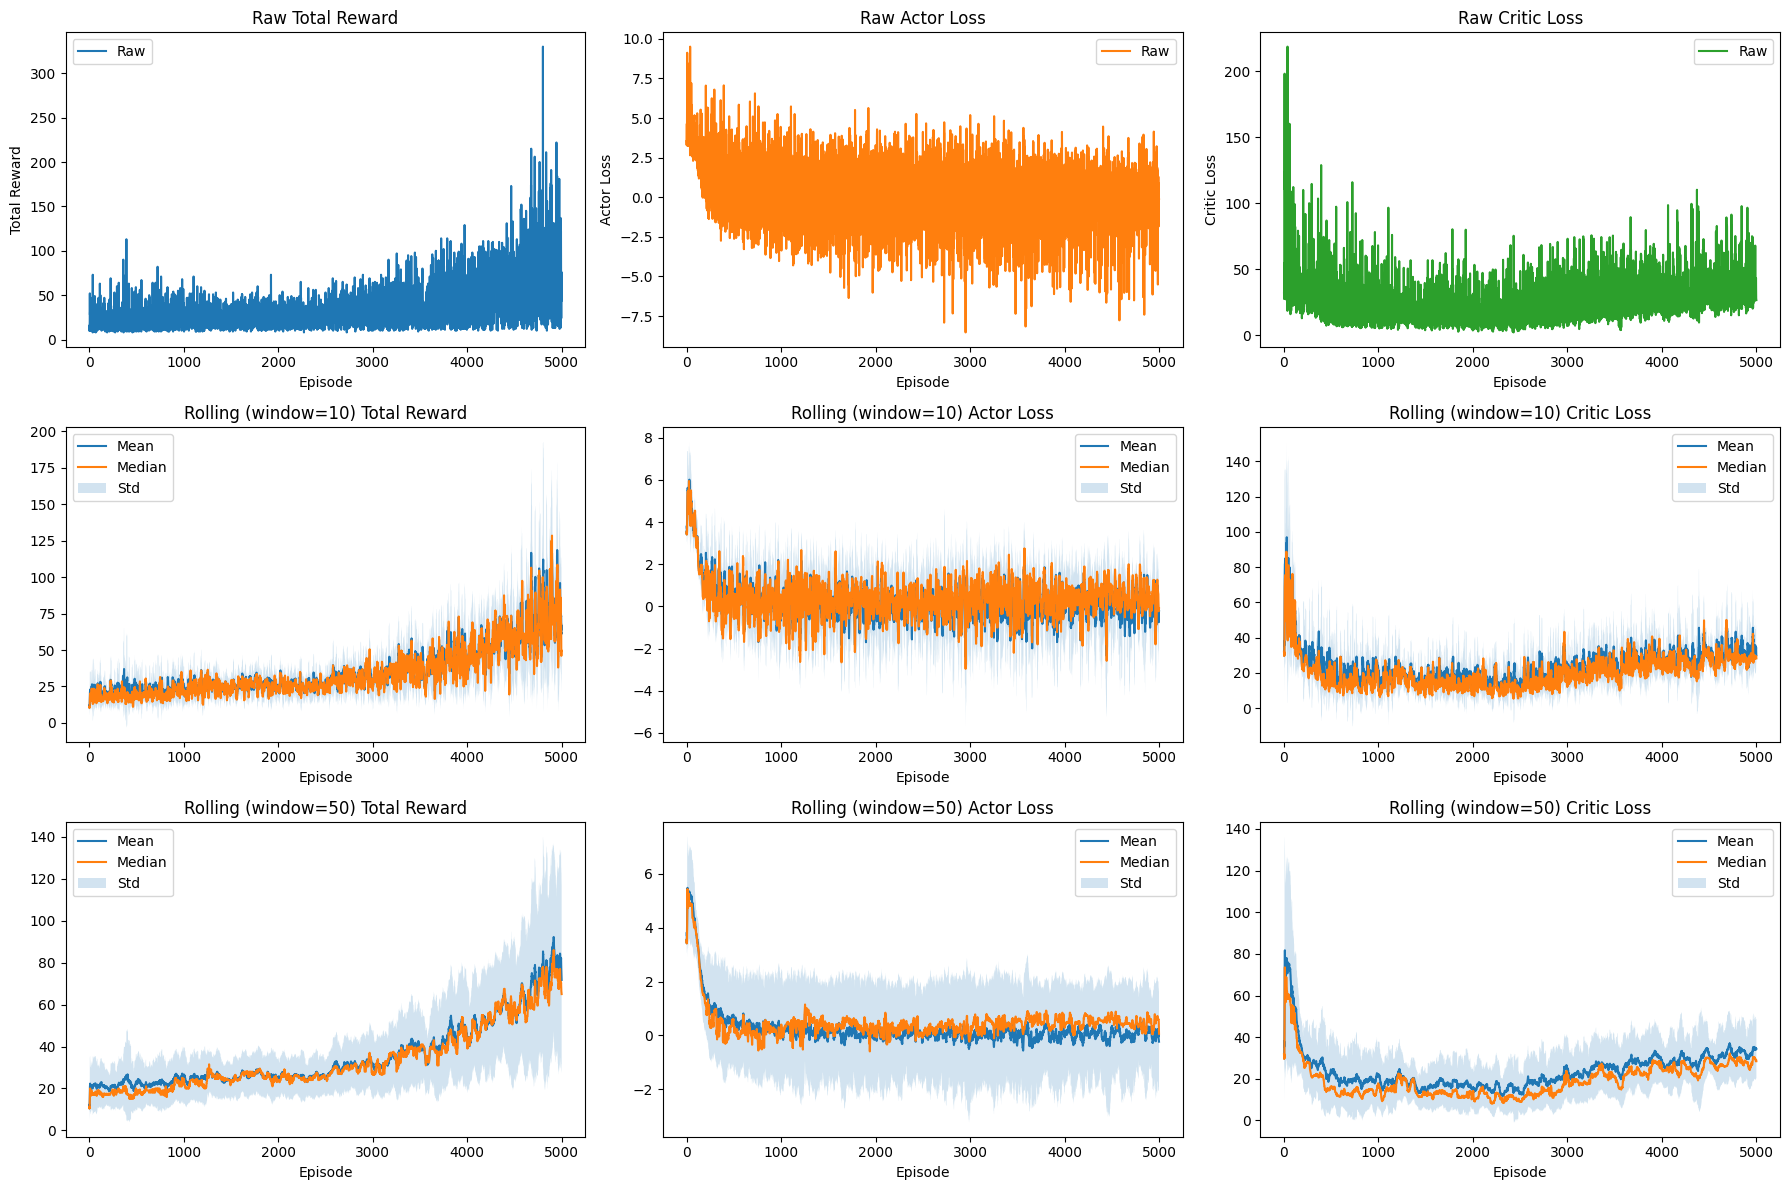

Metrics plot displayed.
Plotting neuron firing rates...


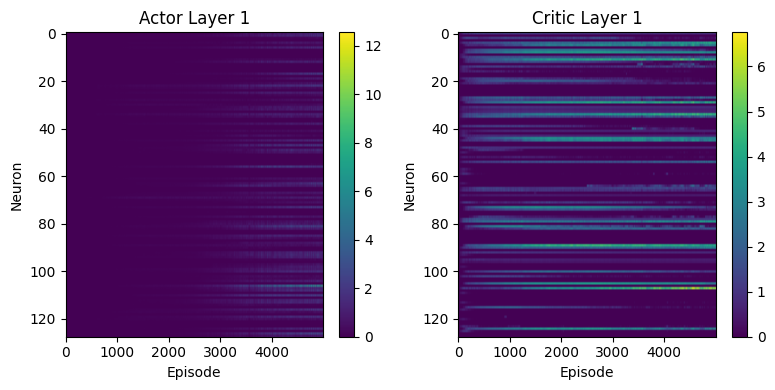

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [ ]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from partial_cartpole import CartPolePartialObservation
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 1e-3,
    "critic_lr": 1e-3,
    "num_episodes": 5000,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 20,
    "record_history": 10
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment to get partial observations
print("Wrapping base environment for partial observations (position, angle)")
env = CartPolePartialObservation(base_env)

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=10,
    window_2=50
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

2025-04-14 14:03:22.189258: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744632202.981213   99596 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744632203.249509   99596 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744632205.335356   99596 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744632205.335388   99596 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744632205.335389   99596 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' to sys.path
Setup Complete.
Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 3000
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: GRU_modified
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 50
  record_history: 20
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...


2025-04-14 14:04:03.292185: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 3000 episodes...
Episode 50	Total Reward: 12.00	Actor Loss: 2.9941	Critic Loss: 30.9037
Episode 100	Total Reward: 40.00	Actor Loss: 7.0834	Critic Loss: 132.2750
Episode 150	Total Reward: 15.00	Actor Loss: 4.2919	Critic Loss: 41.3358
Episode 200	Total Reward: 16.00	Actor Loss: 3.6442	Critic Loss: 43.8641
Episode 250	Total Reward: 19.00	Actor Loss: 4.2965	Critic Loss: 54.4100
Episode 300	Total Reward: 17.00	Actor Loss: 3.7751	Critic Loss: 44.6790
Episode 350	Total Reward: 14.00	Actor Loss: 2.4641	Critic Loss: 29.8141
Episode 400	Total Reward: 21.00	Actor Loss: 2.0611	Critic Loss: 36.1522
Episode 450	Total Reward: 14.00	Actor Loss: -0.1258	Critic Loss: 22.4580
Episode 500	Total Reward: 62.00	Actor Loss: 5.6628	Critic Loss: 91.0482
Episode 550	Total Reward: 9.00	Actor Loss: -2.4851	Critic Loss: 31.9303
Episode 600	Total Reward: 25.00	Actor Loss: 2.0553	Critic Loss: 20.1305
Episode 650	Total Reward: 33.00	Actor Loss: 2.8040	Critic Loss: 32.8927
Episo

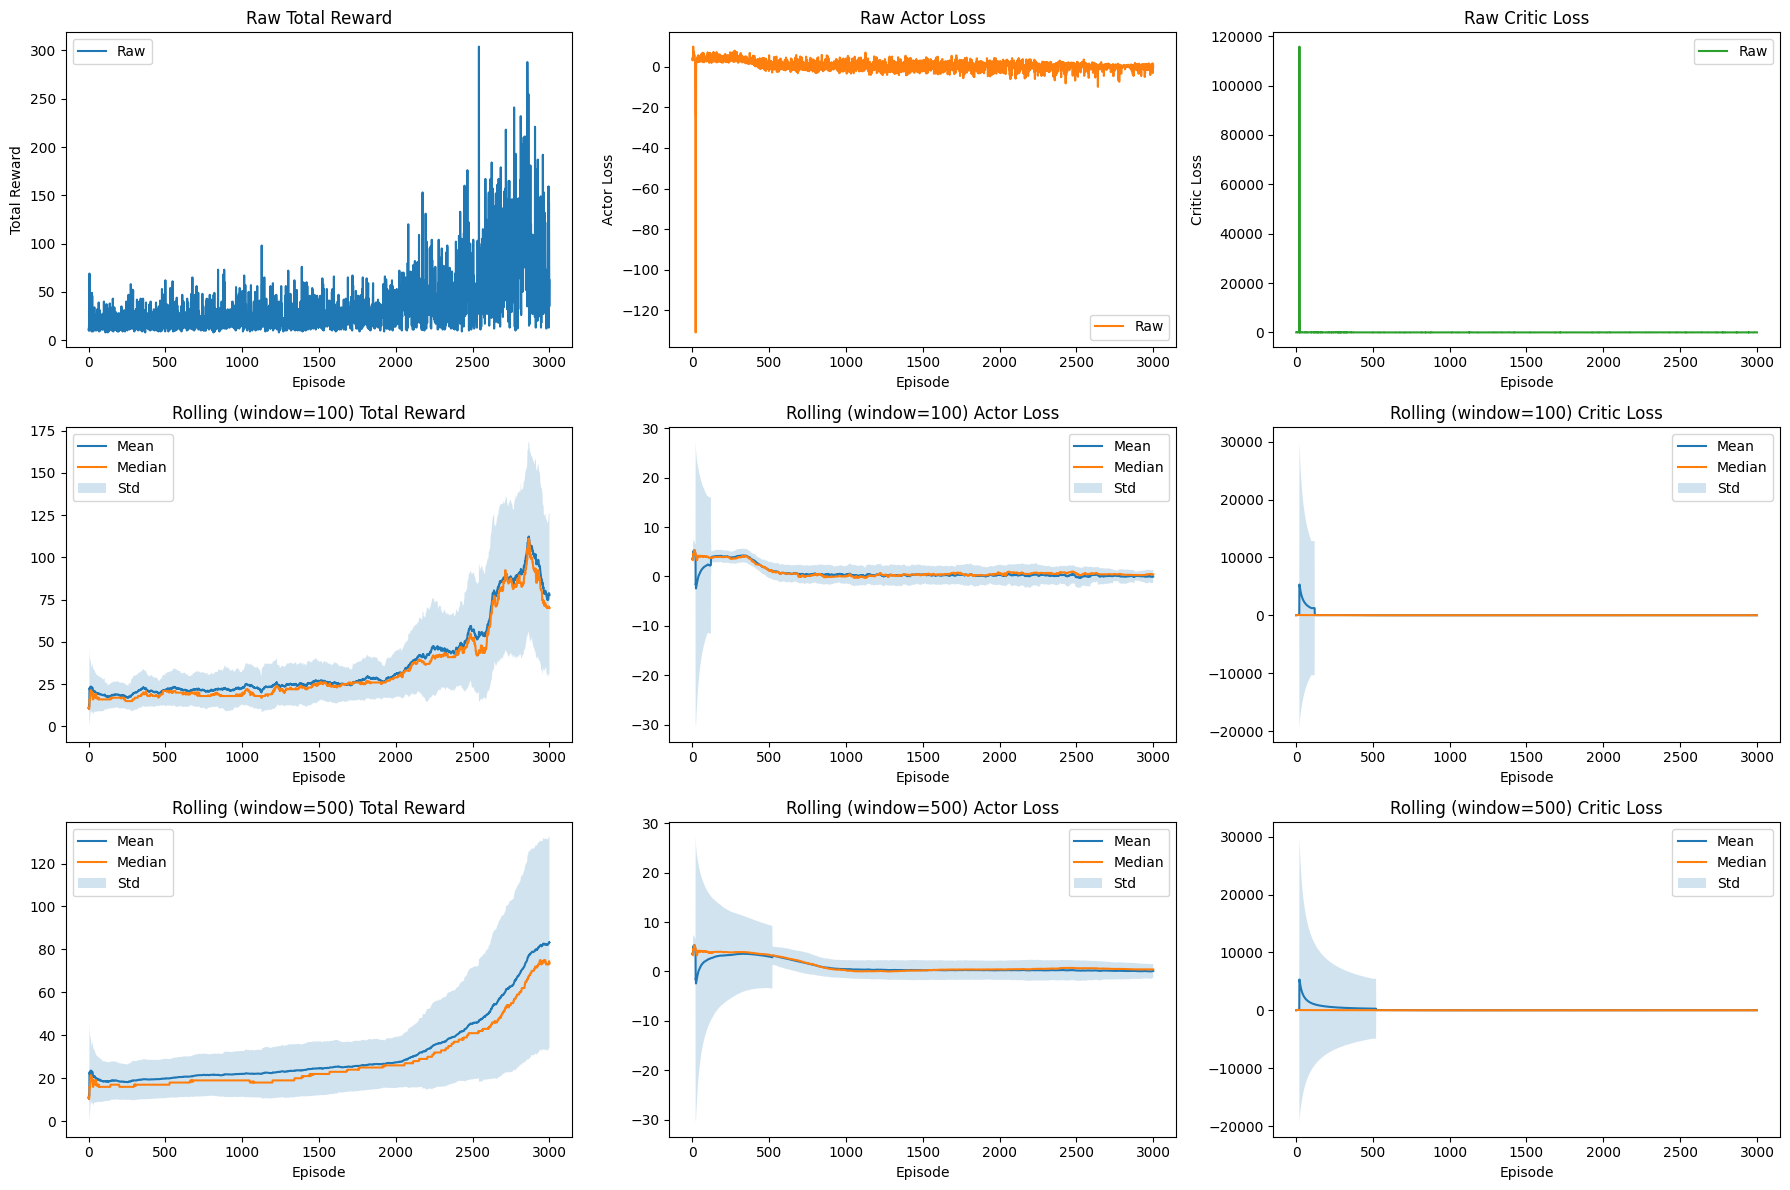

Metrics plot displayed.
Plotting neuron firing rates...


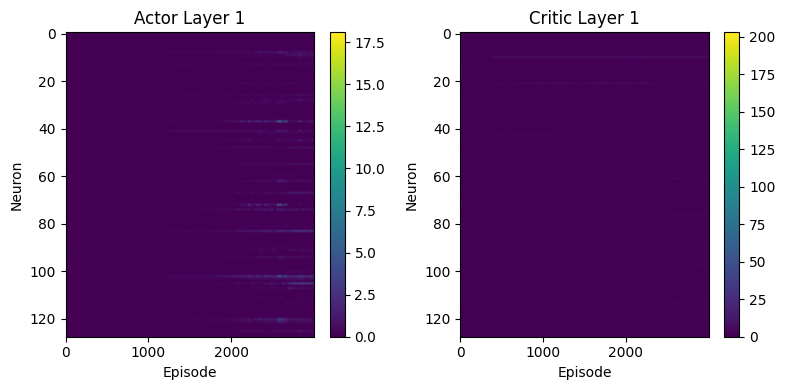

Firing rate plot displayed.
Closing the environment...
Environment closed.


In [1]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from partial_cartpole import CartPolePartialObservation
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 3000,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "GRU_modified",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 50,
    "record_history": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment to get partial observations
print("Wrapping base environment for partial observations (position, angle)")
env = CartPolePartialObservation(base_env)

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=100,
    window_2=500
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")

#### FFNN partial

2025-04-12 04:48:11.514694: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744426092.922460   66882 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744426093.297569   66882 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744426096.683100   66882 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744426096.683155   66882 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744426096.683156   66882 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules' to sys.path
Setup Complete.
Configuration loaded:
  env_name: CartPole-v1
  actor_hidden_size: 128
  critic_hidden_size: 128
  actor_layers: 1
  critic_layers: 1
  actor_lr: 0.005
  critic_lr: 0.005
  num_episodes: 3500
  gamma: 0.95
  noise_std: 0.01
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  layer_type: Dense
  l2_actor: 0.001
  l2_critic: 0.001
  print_interval: 200
  record_history: 20
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...


2025-04-12 04:49:16.006469: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 3500 episodes...
Episode 200	Total Reward: 35.00	Actor Loss: 3.1091	Critic Loss: 38.8585
Episode 400	Total Reward: 28.00	Actor Loss: -0.9961	Critic Loss: 19.4266
Episode 600	Total Reward: 28.00	Actor Loss: -0.1820	Critic Loss: 14.2253
Episode 800	Total Reward: 57.00	Actor Loss: 0.5613	Critic Loss: 15.5465
Episode 1000	Total Reward: 31.00	Actor Loss: -0.6159	Critic Loss: 17.6857
Episode 1200	Total Reward: 30.00	Actor Loss: 0.1125	Critic Loss: 13.6859
Episode 1400	Total Reward: 45.00	Actor Loss: -1.0051	Critic Loss: 23.4205
Episode 1600	Total Reward: 54.00	Actor Loss: 0.7391	Critic Loss: 15.8971
Episode 1800	Total Reward: 41.00	Actor Loss: 0.4850	Critic Loss: 14.9411
Episode 2000	Total Reward: 57.00	Actor Loss: 1.0753	Critic Loss: 24.8799
Episode 2200	Total Reward: 41.00	Actor Loss: 0.3326	Critic Loss: 17.7960
Episode 2400	Total Reward: 55.00	Actor Loss: 0.5783	Critic Loss: 14.6458
Episode 2600	Total Reward: 41.00	Actor Loss: -0.0999	Critic Loss: 

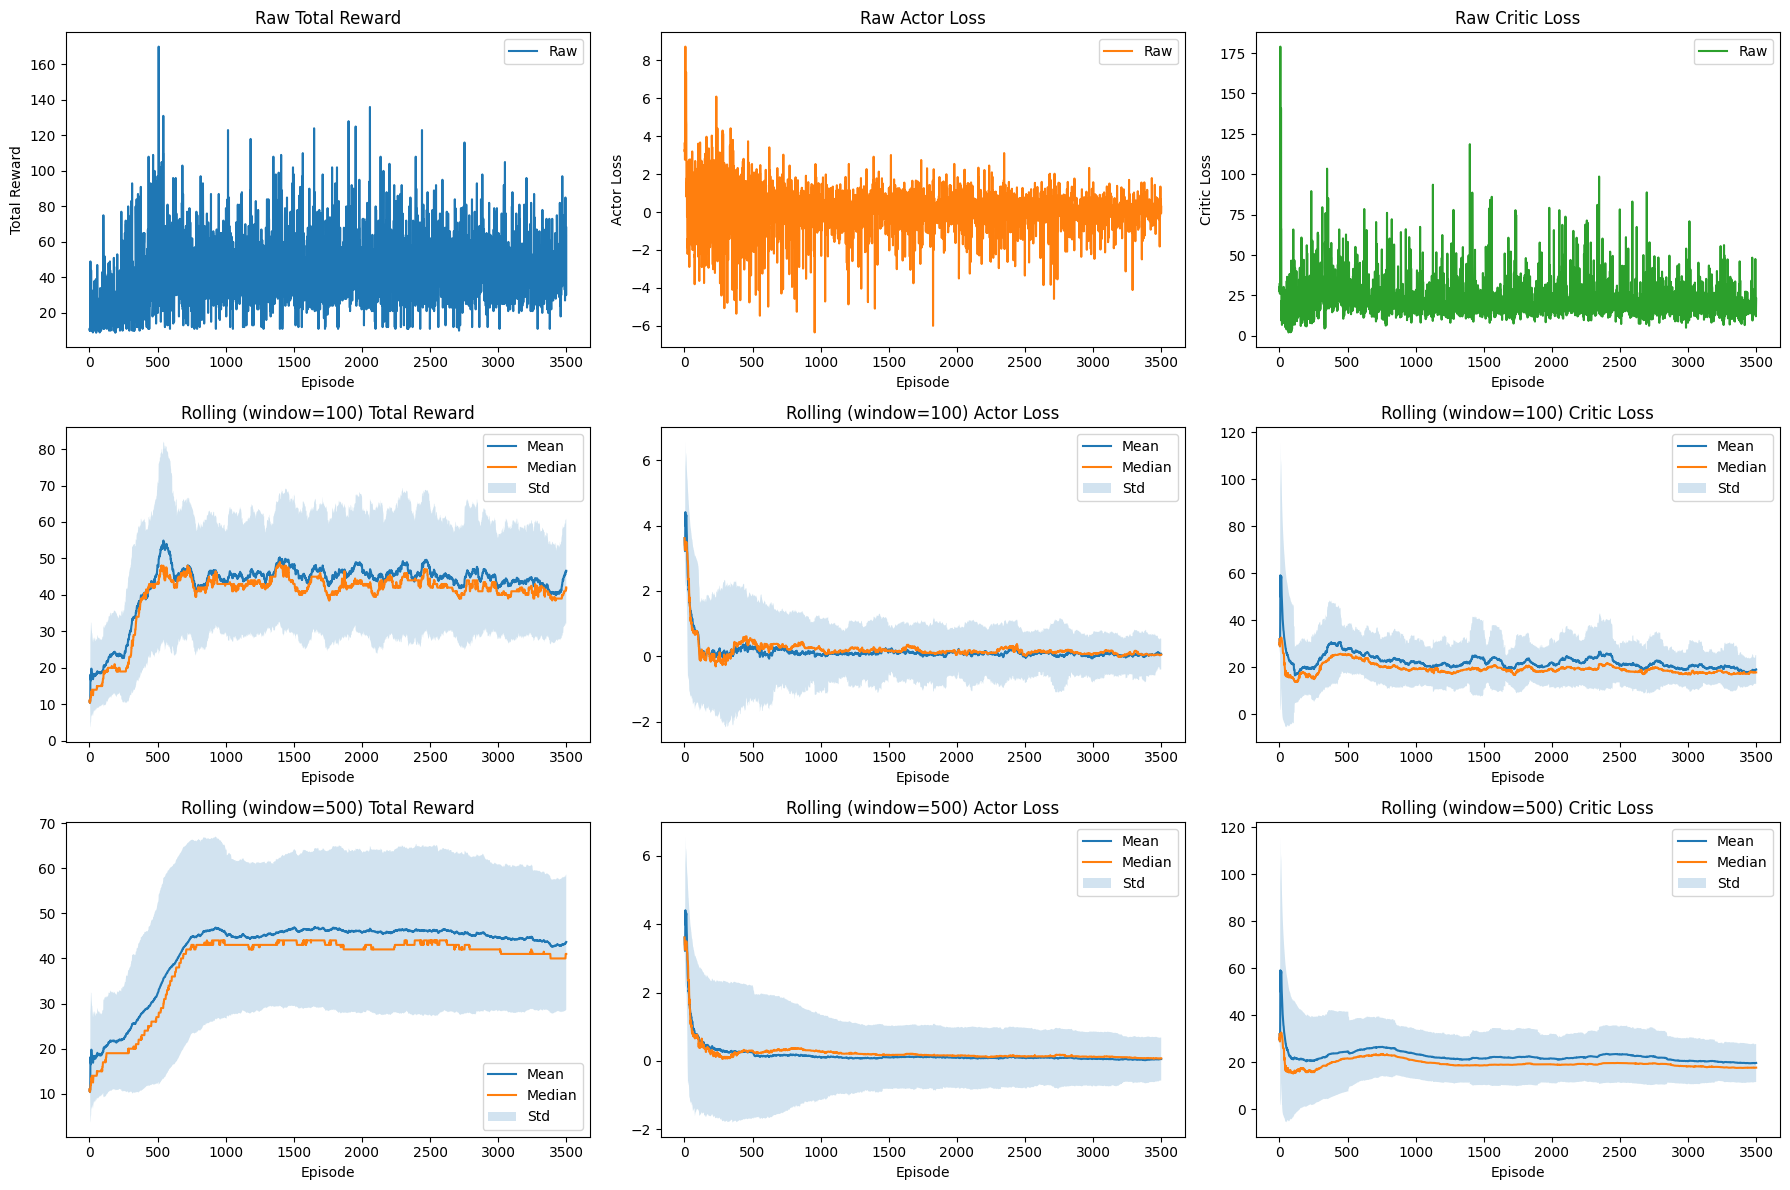

Metrics plot displayed.
Firing rate data not available (models might be Dense or logging was disabled/failed).
Closing the environment...
Environment closed.


In [1]:
# --- Imports ---
import os
import sys
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from partial_cartpole import CartPolePartialObservation
from actor_critic import ActorCriticAgent
from reinforce import train_agent
from helper_functions import plot_metrics, plot_firing_rates

# --- Set Random Seeds ---
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

print("Setup Complete.")

# --- Training Configuration ---
config = {
    "env_name": "CartPole-v1",
    "actor_hidden_size": 128,
    "critic_hidden_size": 128,
    "actor_layers": 1,
    "critic_layers": 1,
    "actor_lr": 5e-3,
    "critic_lr": 5e-3,
    "num_episodes": 3500,
    "gamma": 0.95,
    "noise_std": 0.01,
    "actor_prob_connection": 0.1,
    "critic_prob_connection": 1.0,
    "layer_type": "Dense",
    "l2_actor": 1e-3,
    "l2_critic": 1e-3,
    "print_interval": 200,
    "record_history": 20
}

print("Configuration loaded:")
for key, value in config.items():
    print(f"  {key}: {value}")

# --- Environment Setup ---
print(f"Creating base environment: {config['env_name']}")
base_env = gym.make(config["env_name"])

# Wrap the base environment to get partial observations
print("Wrapping base environment for partial observations (position, angle)")
env = CartPolePartialObservation(base_env)

# Get observation and action space sizes
obs_size = env.observation_space.shape[0]
act_size = env.action_space.n
print(f"Observation size: {obs_size}, Action size: {act_size}")

# Seed for the environment reset for reproducibility
env.reset(seed=seed_value)

# --- Agent Setup ---
print("Initializing Actor-Critic Agent...")
agent = ActorCriticAgent(
    obs_size=obs_size,
    act_size=act_size,
    actor_hidden_size=config["actor_hidden_size"],
    critic_hidden_size=config["critic_hidden_size"],
    actor_layers=config["actor_layers"],
    critic_layers=config["critic_layers"],
    actor_lr=config["actor_lr"],
    critic_lr=config["critic_lr"],
    noise_std=config["noise_std"],
    actor_prob_connection=config["actor_prob_connection"],
    critic_prob_connection=config["critic_prob_connection"],
    layer_type=config["layer_type"] # Ensure this key matches the agent's expected argument name
)

print("Agent Initialized.")

# --- Training ---
print(f"Starting training for {config['num_episodes']} episodes...")

total_rewards_history, actor_loss_history, critic_loss_history, \
actor_firing_rates, critic_firing_rates = train_agent(
    env=env,
    agent=agent,
    num_episodes=config["num_episodes"],
    gamma=config["gamma"],
    print_interval=config["print_interval"],
    l2_actor=config["l2_actor"],
    l2_critic=config["l2_critic"]
)

print("\nTraining finished.")

# --- Plot Training Metrics ---
print("Plotting training metrics...")

plot_metrics(
    total_rewards_history,
    actor_loss_history,
    critic_loss_history,
    window_1=100,
    window_2=500
)

print("Metrics plot displayed.")

# --- Plot Firing Rates ---

# Check if firing rates were collected
if actor_firing_rates is not None and critic_firing_rates is not None:
    print("Plotting neuron firing rates...")
    plot_firing_rates(actor_firing_rates, critic_firing_rates)
    print("Firing rate plot displayed.")

elif actor_firing_rates is not None:
     print("Plotting only Actor firing rates (Critic might be Dense or logging failed)...")
     pass
elif critic_firing_rates is not None:
     print("Plotting only Critic firing rates (Actor might be Dense or logging failed)...")
     pass
else:
    print("Firing rate data not available (models might be Dense or logging was disabled/failed).")

# --- Close the Environment ---
print("Closing the environment...")
env.close()
print("Environment closed.")